In [ ]:
%pip install seaborn
%pip install folium

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [ ]:
#Creating Visualizations for Data Analysis
#TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

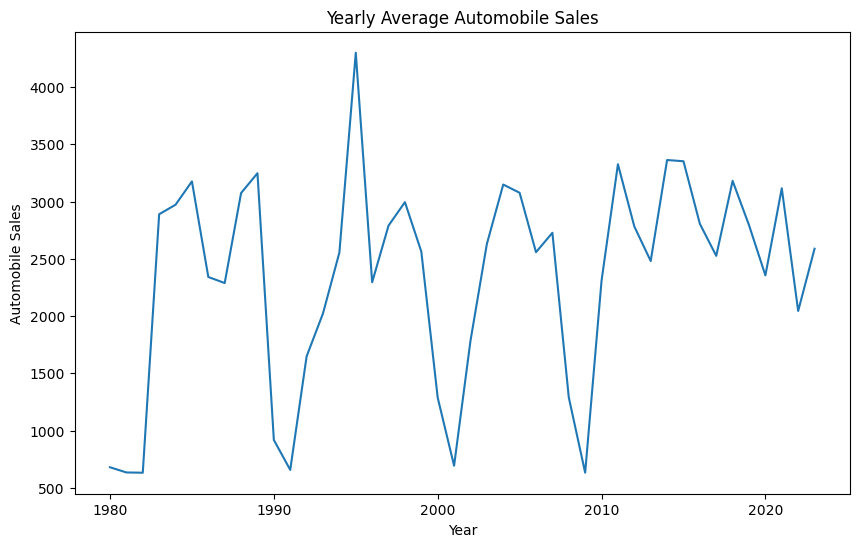

In [7]:
##create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#create figure
plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xlabel=('Year')
plt.ylabel('Automobile Sales')
plt.title('Yearly Average Automobile Sales')
plt.show()

In [ ]:
Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession
annotation for at least two years of recession
Title as Automobile Sales during Recession

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

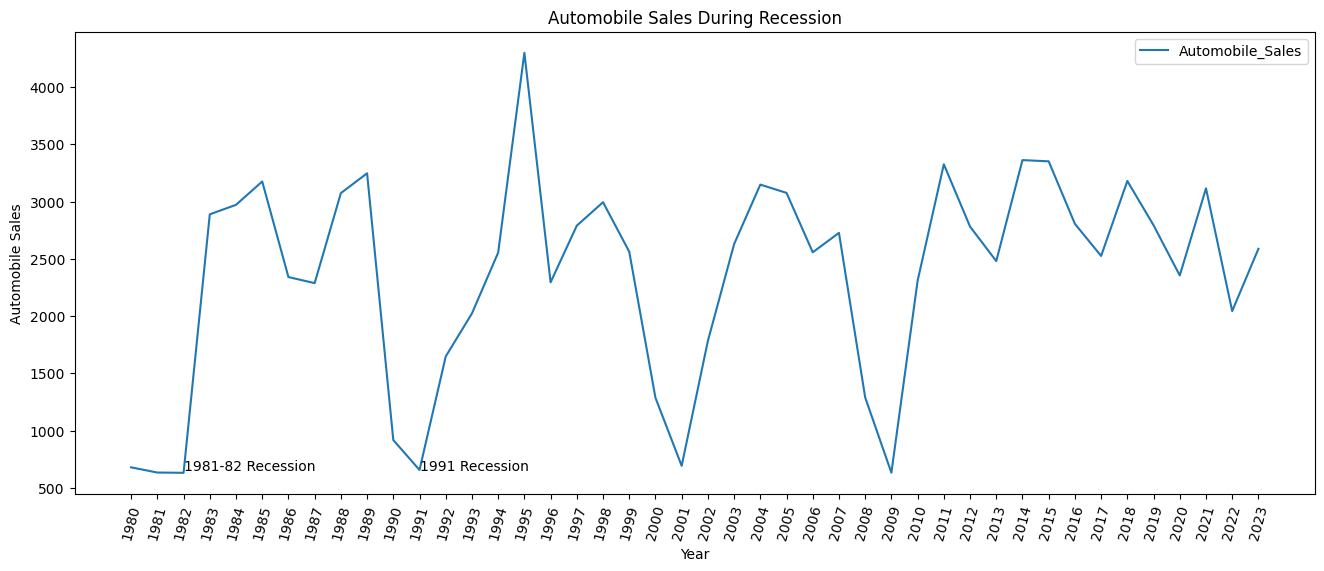

In [12]:
years = list(range(1980,2024))
plt.figure(figsize=(16,6))
df_line.plot.line(x = 'Year', y = 'Automobile Sales', title = 'Automobile Sales During Recession')
plt.xticks(years, rotation=75)
plt.ylabel('Automobile Sales')
plt.text( 1982, 650, '1981-82 Recession')
plt.text(1991, 650, '1991 Recession')
plt.legend()
plt.show()

In [ ]:
TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference 
    in sales trends between different vehicle types during recession periods?

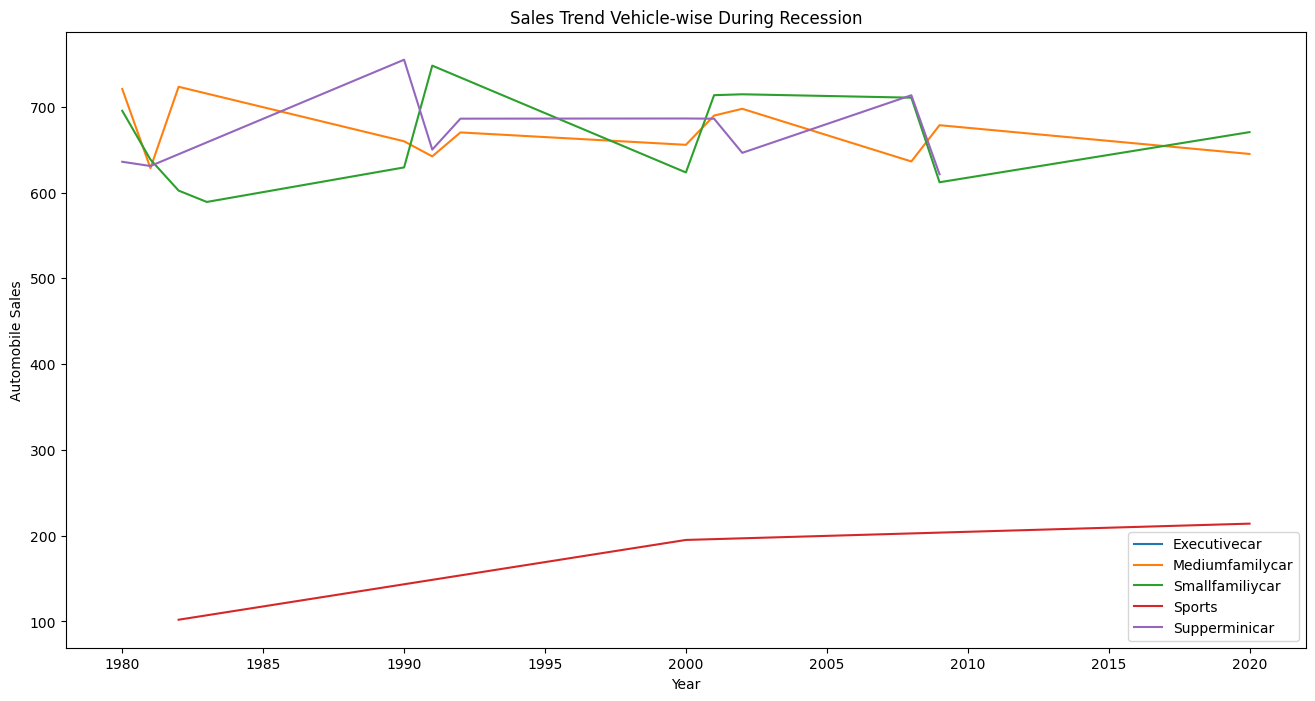

In [13]:
df_rec = df[df['Recession']==1]
df_type = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_type.set_index('Year', inplace=True)
df_type = df_type.groupby(['Vehicle_Type'])['Automobile_Sales']
plt.figure(figsize=(16,8))
df_type.plot.line(xlabel = 'Year', ylabel = 'Automobile Sales', title = 'Sales Trend Vehicle-wise During Recession')
plt.legend()
plt.show()

In [ ]:
Inference: From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the superminicar and smallfamilycar increased.


In [ ]:
TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

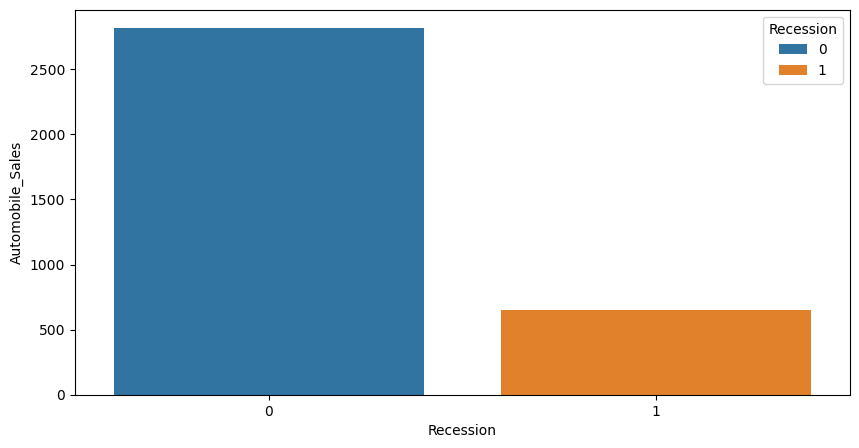

<class 'TypeError'>: 'str' object is not callable

In [15]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot( data=new_df, x='Recession', y='Automobile_Sales', hue='Recession')
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales During Recession and Non-Recession')
plt.xticks(ticks[0,1], labels=['Non-Recession', 'Recession'])
plt.show()

In [ ]:
Now you want to compare the sales of different vehicle types during a recession and a non-recession period

We recommend that you use the functionality of Seaborn Library to create this visualization

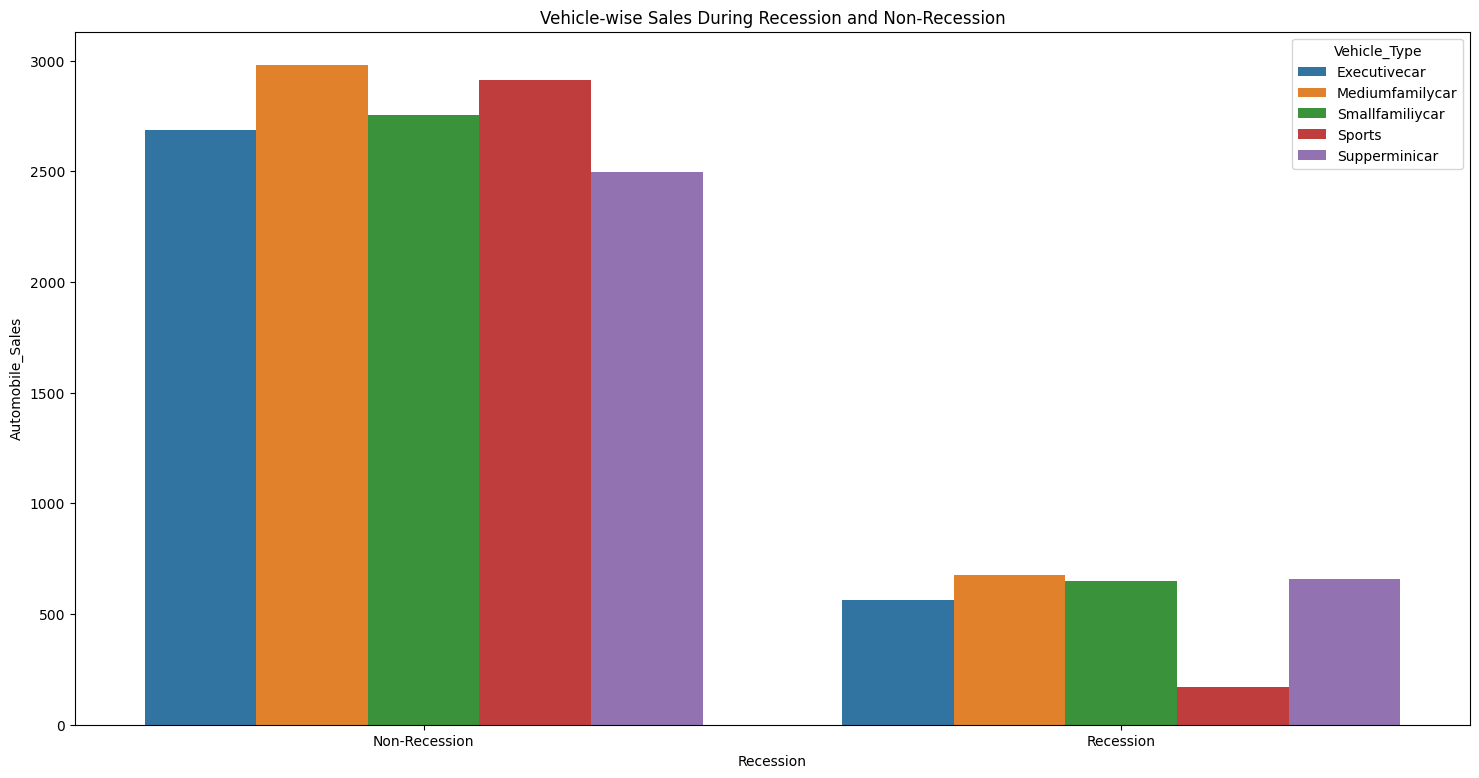

In [16]:
df_type2 = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(18,9))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=df_type2)
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.xlabel="Recession"
plt.ylabel="Automobile Sale"
plt.title('Vehicle-wise Sales During Recession and Non-Recession')
plt.show()

In [ ]:
From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports


In [ ]:
TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.


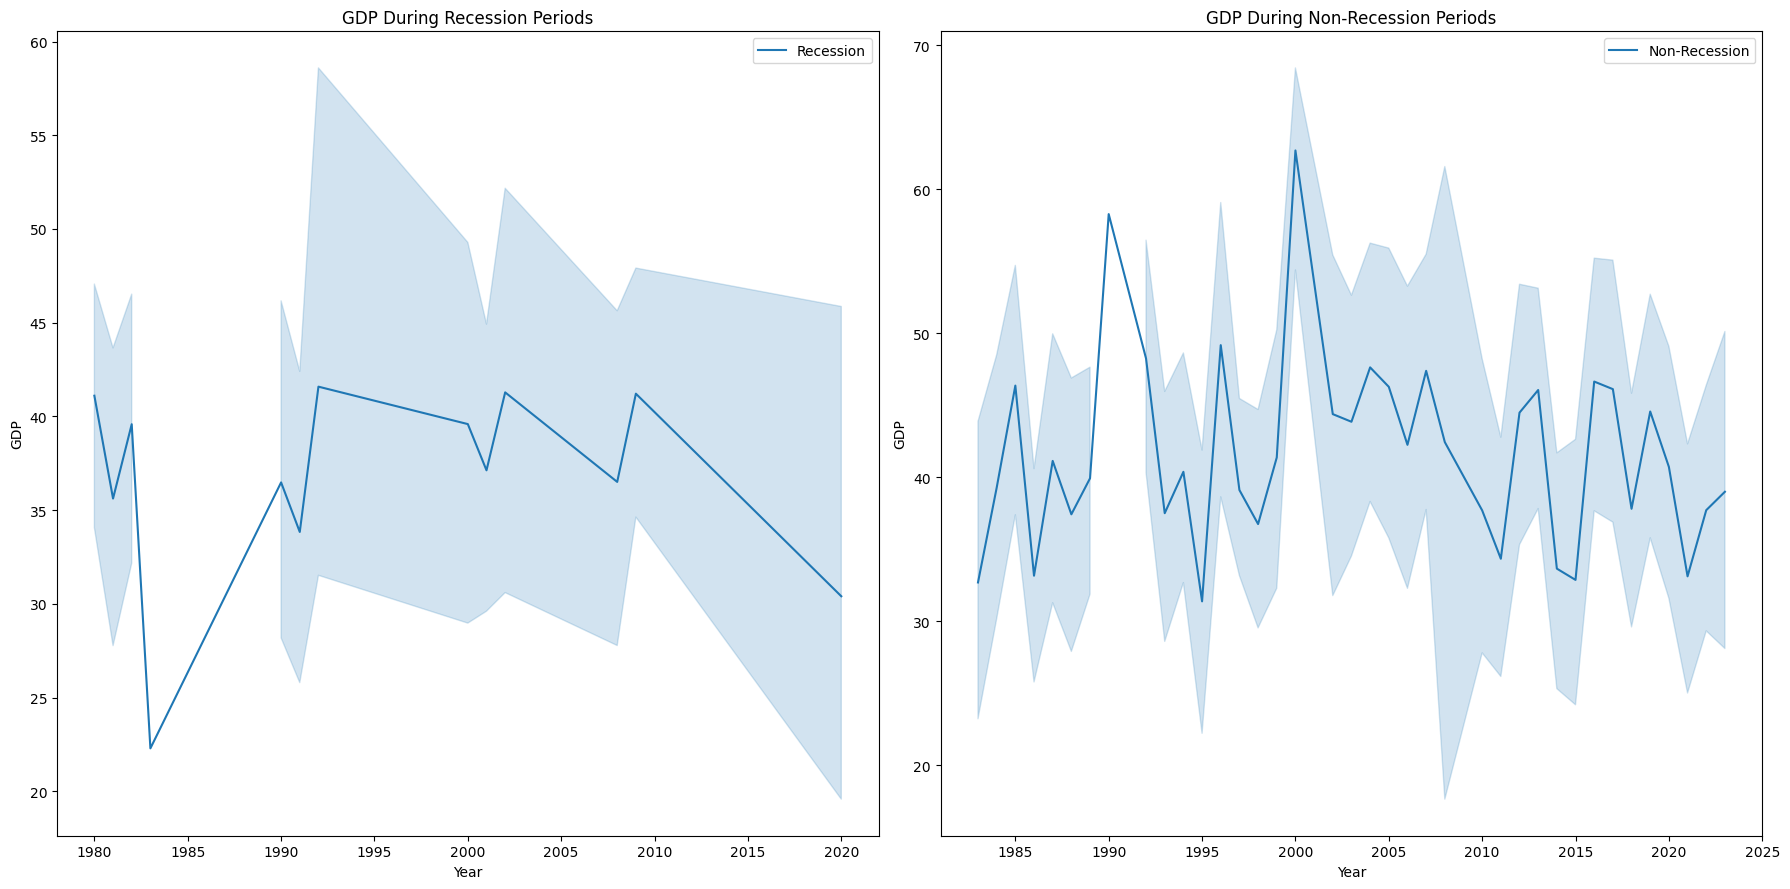

In [18]:
# Separate data for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Set up figure and subplots with plt.subplots()
fig, ax = plt.subplots(1, 2, figsize=(18, 9))

# Plot GDP during Recession on the first subplot
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP')
ax[0].set_title('GDP During Recession Periods')
ax[0].legend()

# Plot GDP during Non-Recession on the second subplot
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('GDP')
ax[1].set_title('GDP During Non-Recession Periods')
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company

In [ ]:
TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

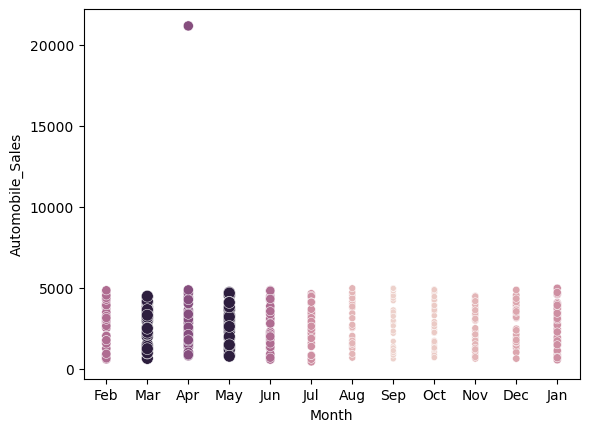

<class 'TypeError'>: 'str' object is not callable

In [23]:
size=non_rec_data['Seasonality_Weight']
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')
plt.show()

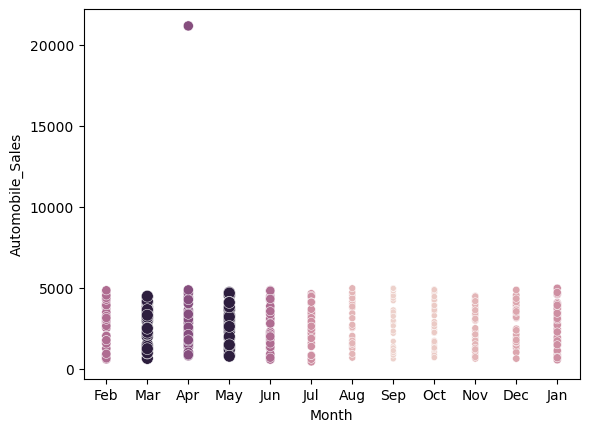

<class 'TypeError'>: 'str' object is not callable

In [20]:
# Create scatter plot with size and hue based on 'Seasonality_Weight' column
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size="Seasonality_Weight", hue="Seasonality_Weight", legend=False)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

# Show plot
plt.show()

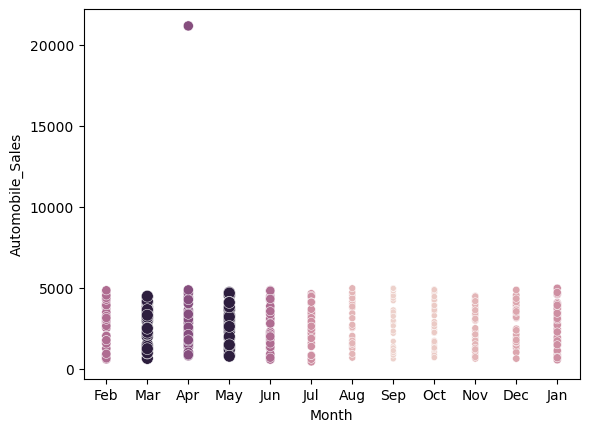

<class 'TypeError'>: 'str' object is not callable

In [21]:
# Re-import matplotlib.pyplot to reset any overwritten functions
import matplotlib.pyplot as plt

# Create scatter plot with size and hue based on 'Seasonality_Weight' column
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size="Seasonality_Weight", hue="Seasonality_Weight", legend=False)

# Set labels and title
plt.xlabel('Month')  # Use xlabel as a function
plt.ylabel('Automobile Sales')  # Use ylabel as a function
plt.title('Seasonality Impact on Automobile Sales')  # Use title as a function

# Show plot
plt.show()

In [ ]:
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

In [ ]:
TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

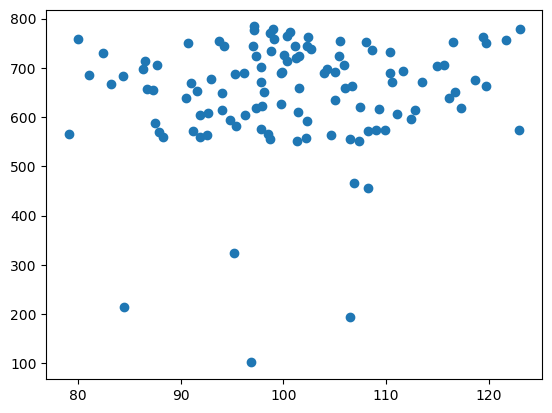

<class 'TypeError'>: 'str' object is not callable

In [24]:
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automoile Sales During Recessions')
plt.show()